# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

## Portfolios
*Review portfolio settings*

In [3]:
PM.review('portfolio')

Portfolio: MMT, PER, WTR, LIQ, IRP, HANA, FCTR, KRX


In [4]:
PM.review_portfolio('WTR')

{'strategy': 'WTR', 'universe': 'UV_WTR'}

In [5]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR', strategy=True)

{'method_select': 'All',
 'method_weigh': 'Equally',
 'file': 'pf_wtr_static',
 'path': 'transaction'}

In [6]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

# Universe

In [3]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_IRP, UV_HANA, UV_FCTR


In [4]:
WidgetUniverse

## K200

In [9]:
k200 = PM.create_universe('UV_K200')

201 securities from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded


In [8]:
k200.portfolio_data

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'tickers': 'KRX/INDEX/STOCK/1028',
   'daily': True,
   'path': 'data'},
  'name': 'UV_K200'}}

In [9]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

## KRX

In [32]:
krx = PM.create_universe('UV_KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [33]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded


In [10]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [11]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2021-01-04 to 2024-11-21 downloaded.
etfs_weather_241121.csv saved
df_prices updated
Execution time of download: 0.53 secs


In [16]:
#wtr.save()

etfs_weather_241120.csv saved


## FCTR

In [18]:
fctr = PM.create_universe('UV_FCTR')

7 assets from 2021-01-04 to 2024-11-08 uploaded.
df_prices loaded


In [19]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

In [20]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

## IRP

In [5]:
irp = PM.create_universe('UV_IRP')

In [6]:
kw = dict(
    n_years=1, 
    close_today = WidgetUniverse.values(1),
    #tickers='selected'
)
irp.download(**kw) if WidgetUniverse.values(0) else None

6 tickers set


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.06it/s]

0.9 secs elapsed, 0.0 secs paused (0.0%)
Max error of conversions: 8.42e-05
... done
6 securities from 2023-01-31 to 2024-10-31 downloaded.
funds_irp_prices_241031.csv saved
df_prices updated
Execution time of download: 0.87 secs


In [7]:
irp.convert_to_daily(confirm=True)

K55234DF2657: 12
K55234DF2459: 12
K55301DW1763: 12
K55301BU6139: 12
K55105BU1161: 12
K55210BU2385: 12
REMINDER: 6 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [8]:
irp.get_date_range().sort_values('end date')

,name,start date,end date,n
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,2023-01-31,2024-10-31,640
K55234DF2459,IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re,2023-01-31,2024-10-31,640
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,2023-01-31,2024-10-31,640
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2023-01-31,2024-10-31,640
K55105BU1161,삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),2023-01-31,2024-10-31,640
K55210BU2385,신한마음편한TDF2030증권투자신탁[주식혼합-재간접형](종류C-re),2023-01-31,2024-10-31,640


In [9]:
irp.performance('sharpe', 'year')

,name,daily_sharpe,monthly_sharpe,yearly_sharpe
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,1.25721,1.637084,NaN
K55234DF2459,IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re,1.421994,1.913251,NaN
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,1.386645,1.85166,NaN
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,1.390048,1.857529,NaN
K55105BU1161,삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),0.947074,1.176866,NaN
K55210BU2385,신한마음편한TDF2030증권투자신탁[주식혼합-재간접형](종류C-re),1.209783,1.562266,NaN


In [10]:
irp.get_names()

0) K55234DF2657: IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re
1) K55234DF2459: IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re
2) K55301DW1763: 미래에셋전략배분TDF2035혼합자산자투자신탁종류O
3) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
4) K55105BU1161: 삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금)
5) K55210BU2385: 신한마음편한TDF2030증권투자신탁[주식혼합-재간접형](종류C-re)

## HANA

In [13]:
hana = PM.create_universe('UV_HANA')

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices loaded
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [25]:
hana.get_date_range()

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2010-01-29,2024-07-31,5298
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,2014-04-30,2024-07-31,3746
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,2014-05-30,2024-07-31,3716
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,2019-10-31,2024-07-31,1736


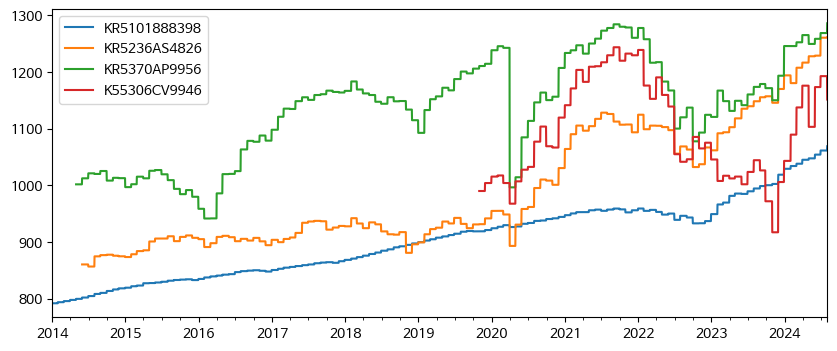

In [26]:
_ = hana.df_prices.loc['2014':].plot(figsize=(10,4))

## LIQ

In [15]:
# portfolio of past trading system to liquidate soon
tickers_liq = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [16]:
liq = PM.create_universe('UV_LIQ')

24 assets from 2021-01-04 to 2024-11-19 uploaded.
df_prices loaded


In [17]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #tickers_liq,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.40it/s]

1.4 secs elapsed, 0.0 secs paused (0.0%)
... done
24 assets from 2021-01-04 to 2024-11-20 downloaded.
krx_liq_prices_241120.csv saved
df_prices updated
Execution time of download: 1.96 secs


## Additional Data

### Financial Ratio

In [20]:
WidgetUniverse

In [21]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-15 loaded


In [22]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

201 assets from 2021-01-04 to 2024-11-15 uploaded.
df_prices loaded


100%|█████████████████████████████████████████████████████████████| 201/201 [07:35<00:00,  2.27s/it]


7.6 mins elapsed, 16.0 secs paused (3.5%)
Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 downloaded
kospi200_ratios_241119.csv saved


In [23]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [24]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

201 assets from 2021-01-04 to 2024-11-15 uploaded.
df_prices loaded


# Performance

In [31]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, IRP, HANA, FCTR, KRX


In [32]:
pf_list = ['MMT', 'PER', 'WTR']
pm = PM(pf_list)

MMT:
201 assets from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

PER:
201 assets from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

WTR:
6 assets from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded
Transaction record to 2024-11-20 loaded



In [27]:
pm.load('LIQ')

LIQ:
24 assets from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded



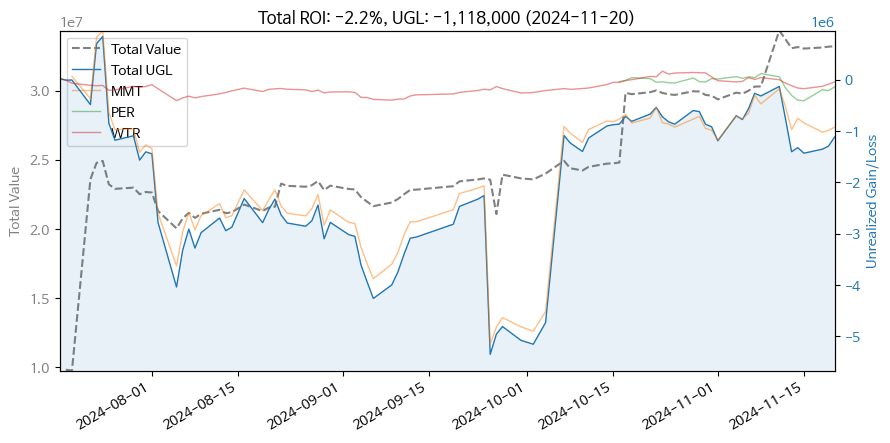

In [33]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
pm.plot(pf_list, start_date=start_date, roi=False)

In [34]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [35]:
pm.valuate(date=w_date.value)

,MMT,PER,WTR,Total
start,2024-07-19,2024-10-16,2024-07-17,2024-07-17
date,2024-11-20,2024-11-20,2024-11-20,2024-11-20
cost,29349501,12249820,10113935,51713256
proceeds,14322250,2621865,437755,17381870
value,14098800,9484880,9629485,33213165
UGL,-928451,-143075,-46695,-1118221
ROI,-0.031634,-0.01168,-0.004617,-0.021623


# Transaction

## MMT

In [20]:
pf_mmt = PM.create_portfolio('MMT')

201 assets from 2021-01-04 to 2024-11-19 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [14]:
pf_mmt.portfolio_data['strategy']

{'data': {'method_select': 'Momentum',
  'method_weigh': 'Equally',
  'sort_ascending': False,
  'n_assets': 5,
  'lookback': '1y',
  'lag': '1w',
  'file': 'pf_k200_momentum',
  'path': 'transaction'},
 'name': 'MMT'}

In [29]:
pf_mmt.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                          
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭  390000            0    8   0.200   0.2119
           012450     한화에어로스페이스  403500           -2    7   0.200   0.1918
           079550        LIG넥스원  266000            0   11   0.200   0.1987
           003230          삼양식품  563000           -1    5   0.200   0.1912
           064350          현대로템   63300           48   48   0.200   0.2064
           011790           SKC  122145          -20    0     NaN   0.0000

In [30]:
# run after editting record file
#_ = pf_mmt.update_record(save=True)

Transaction dates updated for profit/loss on the dates


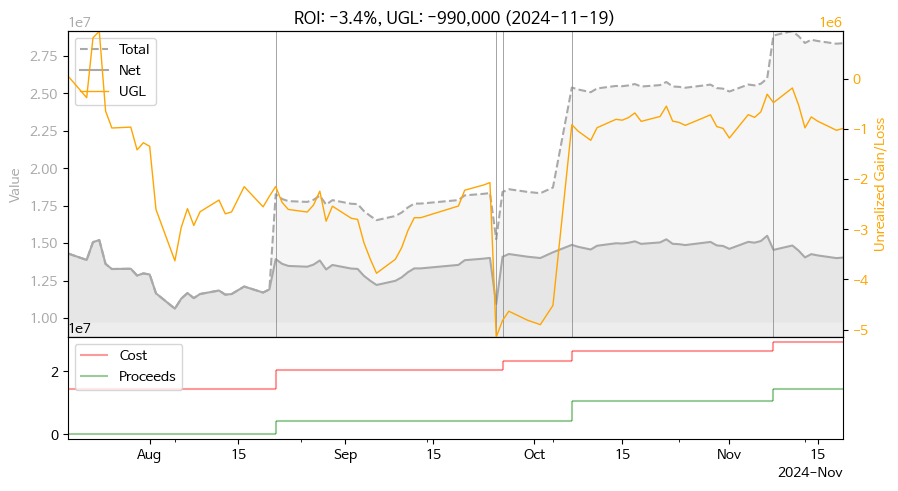

In [21]:
pf_mmt.plot(roi=False)

In [7]:
pf_mmt.valuate()

start       2024-07-22
date        2024-11-15
cost          29349501
proceeds      14322250
value         14184400
UGL            -842851
ROI          -0.028718
dtype: object

In [9]:
#pf_mmt.performance(metrics=METRICS)

,MMT
start,2024-07-22
end,2024-11-15
total_return,0.021894
cagr,0.070573
calmar,0.234286
max_drawdown,-0.301226
avg_drawdown,-0.146865
avg_drawdown_days,37.0
daily_vol,0.786499
daily_sharpe,0.468926


In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-11-06 to 2024-11-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: -3.0% (UGL: -977,000) on 2024-11-13
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                     
2024-11-11 267260   HD현대일렉트릭  390000            0    8    0.2  0.2119
           012450  한화에어로스페이스  403500           -2    7    0.2  0.1918
           079550     LIG넥스원  266000            0   11    0.2  0.1987
           003230       삼양식품  563000           -1    5    0.2  0.1912
           064350       현대로템   63300           48   48    0.2  0.2064
           011790        SKC  122145          -20    0    NaN     0.0
2024-11-13 267260   HD현대일렉트릭  353000           -1    7  0.200  0.1901
           012450  한화에어로스페이스  402000           -1    6  0.200  0.1856
           003230       삼양식품  542000            0    5  0.200  0.2085
           079550     LIG넥스원  247000            0   11  0.200  0.2090
           000150         두산  224000           12   12  0.200  0.2068
           064350       현대로템   62200          -48    0    NaN       0

### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_mmt.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [ ]:
pf_mmt.update_record()

## KRX
*simulation*

In [16]:
pf_krx = PM.create_portfolio('KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded
ERROR from get_names: '287410'
Transaction record to 2024-10-02 loaded


In [17]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

ROI -12.86%, Unrealized G/L -4,042,804 on 2024-10-08


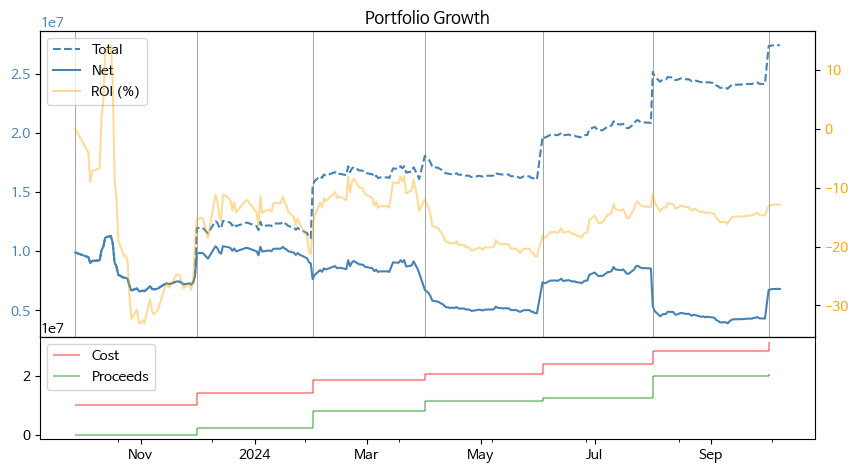

In [18]:
pf_krx.valuate()

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 4 %
ROI -12.80%, Unrealized G/L -4,042,804 on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860    None    9390            6   145  0.200  0.2079
           016670    None    4865           -6   280  0.200  0.2080
           033790    None    9040            2   150  0.200  0.2070
           196170    None  369000           -1     3  0.200  0.1690
           159910    None     734           79  1857  0.200  0.2081

## PER

In [41]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [42]:
pf_per = PM.create_portfolio('PER', df_additional=df_ratio)

201 assets from 2021-01-04 to 2024-11-19 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [12]:
pf_per.portfolio_data

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'upload_type': 'price',
   'path': 'data'},
  'name': 'UV_K200'},
 'strategy': {'data': {'method_select': 'F-ratio',
   'method_weigh': 'Equally',
   'sort_ascending': True,
   'n_assets': 20,
   'lookback': '2m',
   'lag': 0,
   'file': 'pf_k200_per',
   'path': 'transaction'},
  'name': 'PER'}}

In [13]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [14]:
#pf_per.update_record()
#pf_per.view_record(-2)

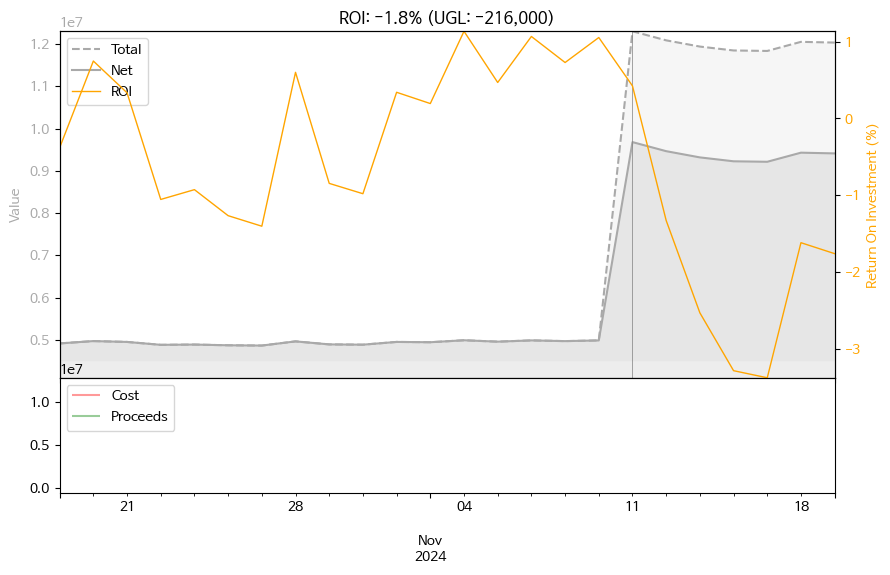

In [43]:
pf_per.plot()

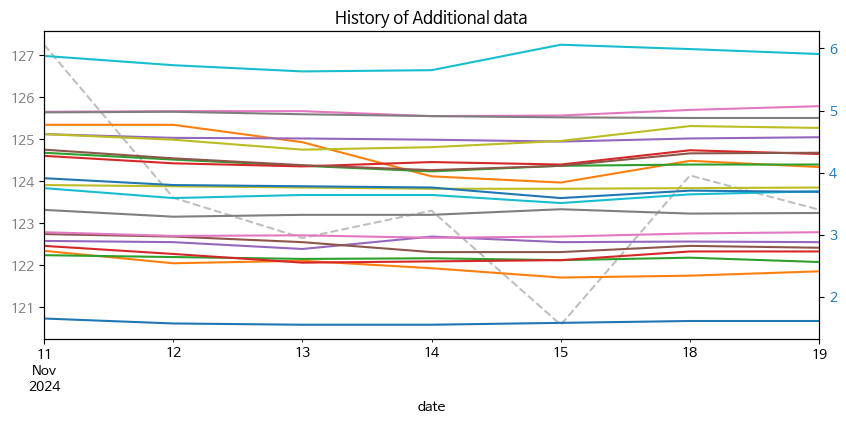

In [44]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [46]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
20 assets selected by Financial Ratio from 2024-09-13 to 2024-11-13
Weights of assets determined by Equal weights.
Mean absolute error of weights: 5 %
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                   
2024-11-13 010060   OCI홀딩스   56600            0    8  0.050  0.0511
           003030   세아제강지주  180800            0    2  0.050  0.0408
           009970  영원무역홀딩스   83700            0    5  0.050  0.0472
           016380     KG스틸    5980            1   77  0.050  0.0519
           047040     대우건설    3445           -5  135  0.050  0.0525
           088350     한화생명    2750          -11  169  0.050  0.0524
           078930       GS   41050           -1   11  0.050  0.0509
           111770     영원무역   39000           -1   11  0.050  0.0484
           139130  DGB금융지주    8200           -7   56  0.050  0.0518
           005830   DB손해보험  105400            0    4  0.050  0.0476
           001450     현대해상   28750           -1   16  0.050  0.0519
           241560     두산밥캣   37850           -1   12  0.050  0.0512
           000270       기아   90800            0    5  0.050  0.0512
           009900     명신산업   13060           -1   35  0.050  0.0516
           024110     기업은행   14380           -3   32  0.050  0.0519
           005850      에스엘   30000           -1   15  0.050  0.0508
           316140   우리금융지주   16110           -4   28  0.050  0.0509
           138930  BNK금융지주    9420           -6   49  0.050  0.0521
           005380      현대차  199900            0    2  0.050  0.0451
           017800   현대엘리베이   48100            0    9  0.050  0.0488

In [13]:
#pf_per.update_record()

## WTR
*modified all weather*

In [36]:
pf_wtr = PM.create_portfolio('WTR')

6 assets from 2021-01-04 to 2024-11-20 uploaded.
df_prices loaded
Transaction record to 2024-11-20 loaded


Transaction dates updated for profit/loss on the dates


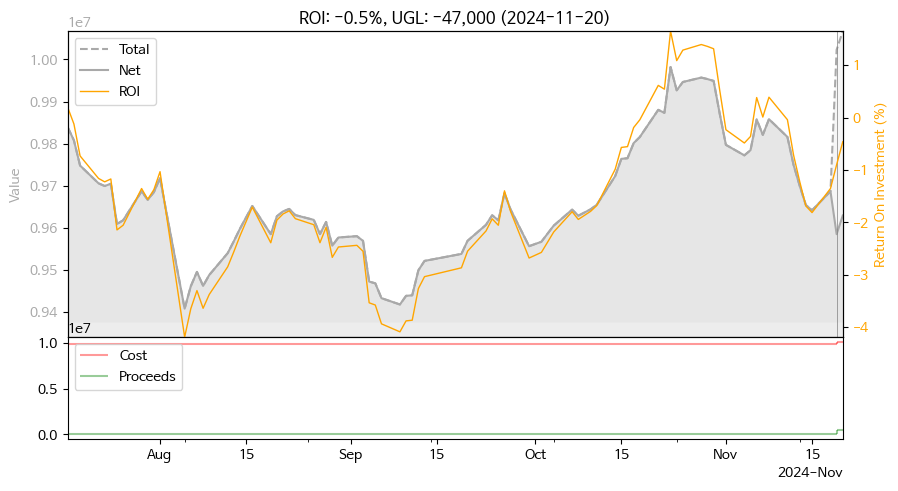

In [37]:
pf_wtr.plot()

In [38]:
pf_wtr.view_record(-2)

name   price  transaction  net  weight  \
date       asset                                                            
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   
2024-11-20 069500             KODEX 200   33010            7   49   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14   0.167   
           148070          KOSEF 국고채10년  117035           -1   13   0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86   0.167   
           411060            ACE KRX금현물   17040          -10   96   0.167   
           284430        KODEX 200미국채혼합   12585            5  129   0.167   

                   weight*  
date       asset            
2024-07-18 069500   0.1670  
           273130   0.1610  
           148070   0.1640  
           379800   0.1690  
           411060   0.1700  
           284430   0.1700  
2024-11-20 069500   0.1684  
           273130   0.1676  
           148070   0.1584  
           379800   0.1680  
           411060   0.1685  
           284430   0.1691

In [12]:
#pf_wtr.performance(metrics=METRICS)

In [7]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [9]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2)

Liquidation set to None
6 assets selected by All from 2024-11-19 to 2024-11-19
Weights of assets determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -0.9% (UGL: -93,000) on 2024-11-19
All transactions saved to pf_wtr_static_241119.csv


name   price  transaction  net weight  \
date       asset                                                           
2024-07-18 069500             KODEX 200   39085           42   42  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14  0.167   
           148070          KOSEF 국고채10년  114910           14   14  0.167   
           379800      KODEX 미국S&P500TR   17625           94   94  0.167   
           411060            ACE KRX금현물   15715          106  106  0.167   
           284430        KODEX 200미국채혼합   13440          124  124  0.167   
2024-11-19 069500             KODEX 200   32945            7   49  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14  0.167   
           148070          KOSEF 국고채10년  116815           -1   13  0.167   
           379800      KODEX 미국S&P500TR   18725           -8   86  0.167   
           411060            ACE KRX금현물   16820          -10   96  0.167   
           284430        KODEX 200미국채혼합   12565            5  129  0.167   

                  weight*  
date       asset           
2024-07-18 069500   0.167  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060    0.17  
           284430    0.17  
2024-11-19 069500  0.1684  
           273130  0.1676  
           148070  0.1584  
           379800  0.1680  
           411060  0.1685  
           284430  0.1691

## LIQ

In [50]:
pf_liq = PM.create_portfolio('LIQ')

24 assets from 2021-01-04 to 2024-11-19 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded


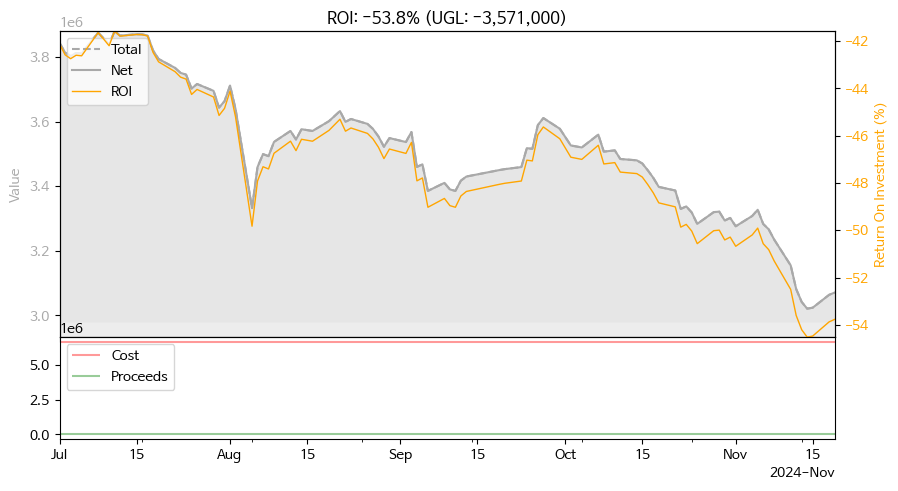

In [51]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [33]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## IRP

In [11]:
selected = ['K55301BU6139', 'K55206C95800']

In [12]:
irp.get_names(selected)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e

In [15]:
pf_irp = PM.create_portfolio('IRP', tickers=selected)

6 securities from 2023-01-31 to 2024-10-31 uploaded.
df_prices loaded
K55234DF2657: 12
K55234DF2459: 12
K55301DW1763: 12
K55301BU6139: 12
K55105BU1161: 12
K55210BU2385: 12
REMINDER: 6 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Transaction record to 2024-06-19 loaded


Transaction dates updated for profit/loss on the dates
Tickers K55206C95800 added to universe


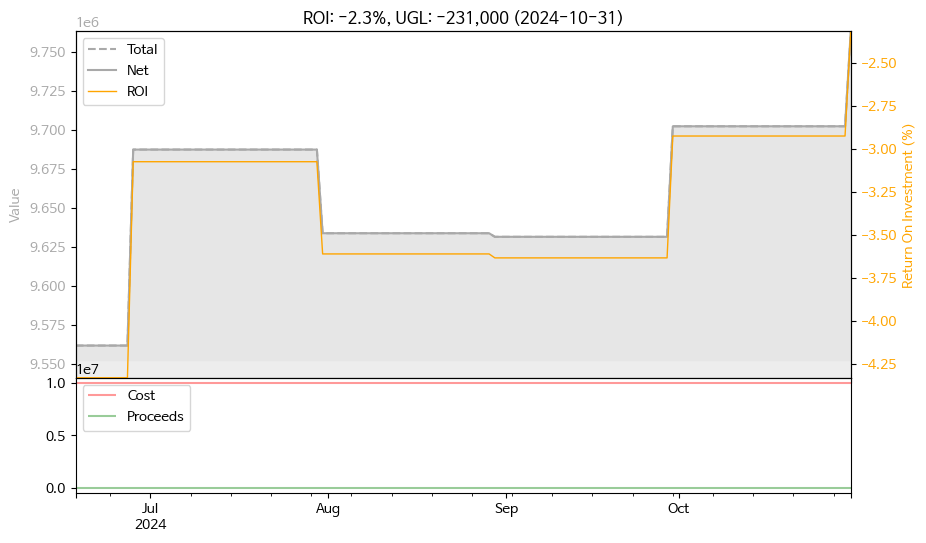

In [16]:
pf_irp.plot()

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_irp.transaction_pipeline(**kwargs)
pf_irp.view_record()

Liquidation set to None


KeyError: "['K55206C95800'] not in index"

Transaction dates updated for profit/loss on the dates
Tickers K55206C95800 added to universe


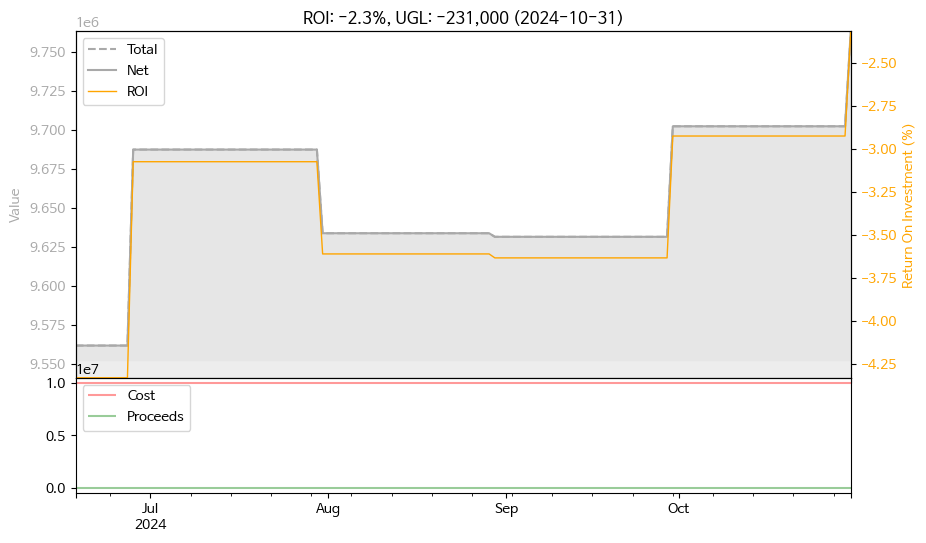

In [19]:
pf_irp.plot()

In [40]:
pf_irp.performance(metrics=METRICS)

,IRP
start,2024-06-19
end,2024-08-26
total_return,-0.003532
cagr,-0.018825
calmar,-0.342151
max_drawdown,-0.055021
avg_drawdown,-0.029718
avg_drawdown_days,26.0
daily_vol,0.059014
daily_sharpe,-0.193009


## HANA

In [14]:
pf_hana = PM.create_portfolio('HANA')

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices loaded
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Transaction record to 2024-07-31 loaded


In [16]:
pf_hana.portfolio_data['strategy']

{'data': {'method_select': 'Selected',
  'method_weigh': 'Equally',
  'file': 'pf_hana_static',
  'path': 'transaction'},
 'name': 'HANA'}

In [42]:
pf_hana.plot()

Portfolio value 9,997,329, Profit 0.1% on 2024-07-31
ERROR: need more data to plot


In [43]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [44]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 assets selected by All from 2024-07-31 to 2024-07-31
ERROR: check the date as no new transaction
Portfolio value 9,997,329, Profit 0.1% on 2024-07-31


name  price  \
date       asset                                                        
2024-07-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   

                         transaction   net  weight  weight*  
date       asset                                             
2024-07-31 KR5101888398         4699  4699   0.502    0.502  
           KR5236AS4826         1920  1920   0.242    0.242  
           KR5370AP9956         1448  1448   0.186    0.186  
           K55306CV9946          602   602   0.069    0.069

In [45]:
pf_hana.plot()

ERROR: need more data to plot


In [46]:
pf_hana.performance(metrics=METRICS)

ERROR: Need more data to measure


# testing

In [2]:
from pf_utils import FundDownloader

path_data = 'data'

In [2]:
file = 'funds_info_test.csv'
#file = 'funds_info_241121.csv'
fd = FundDownloader(file, path_data)

Data for 4 funds loaded.
4 tickers missing data for conversion from rate to price.


In [3]:
fd.check_master()

4 tickers missing data for conversion from rate to price.


Index(['K55234DF2657', 'K55234DF2459', 'K55301DW1763', 'K55301BU6139'], dtype='object', name='ticker')

In [4]:
fd.update_master(file='test_funds_info', path=path_data)

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.25it/s]


0.8 secs elapsed, 0.0 secs paused (0.0%)
data_tickers updated
test_funds_info.csv saved


In [5]:
fd.set_tickers()

4 tickers set


In [7]:
start_date, end_date = '2010-01-01', '2024-11-21'
ers = fd.download(start_date, end_date, file='test_funds_prices', path=path_data)

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.17it/s]

0.5 secs elapsed, 0.0 secs paused (0.0%)
Max error of conversions: 1.17e-05
test_funds_prices_170929_241031.csv saved


<Axes: xlabel='date'>

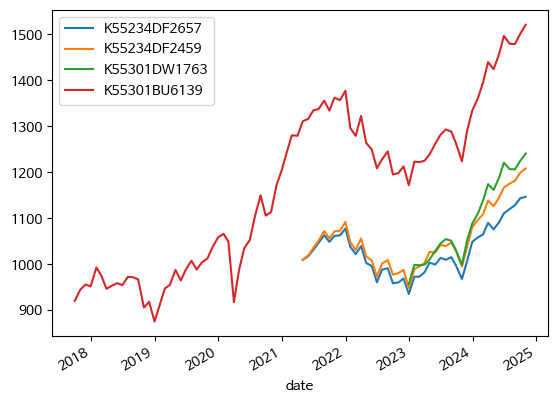

In [8]:
fd.df_prices.plot()

In [3]:
from pf_utils import DataManager

dm = DataManager(universe='fund', file='test_funds_prices')

file = 'funds_info_test.csv'
dm.get_names(file=file, path=path_data)

Data for 4 funds loaded.
4 tickers missing data for conversion from rate to price.


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.93it/s]

0.8 secs elapsed, 0.0 secs paused (0.0%)
data_tickers updated


0) K55234DF2657: IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re
1) K55234DF2459: IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re
2) K55301DW1763: 미래에셋전략배분TDF2035혼합자산자투자신탁종류O
3) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e

# testing

In [5]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [6]:
path_data = 'data'
path_tran = 'transaction'